In [1]:
## Imports libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Reading and preprearing data
df  =pd.read_csv('data/data.csv')

In [3]:
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
'''
Lowercases all the column names, and replaces spaces with underscores
'''
df.columns = df.columns.str.lower().str.replace(' ','_' )
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
features = list(df.columns)

In [7]:
df.dtypes.value_counts()

object     8
int64      5
float64    3
Name: count, dtype: int64

In [8]:
'''
Lowercases and replaces spaces with underscores
for values in all string columns of the DataFrame
'''
string_columns = list(df.dtypes[df.dtypes =='object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Features and target
- **make**: make of a car (BMW, Toyota, and so on)
- **model**: model of a car
- **year**: year when the car was manufactured
- **engine_fuel_type**: type of fuel the engine needs (diesel, electric, and so on)
- **engine_hp**: horsepower of the engine
- **engine_cylinders**: number of cylinders in the engine
- **transmission_type**: type of transmission (automatic or manual)
- **driven_wheels**: front, rear, all
- **number_of_doors**: number of doors a car has
- **market_category**: luxury, crossover, and so on
- **vehicle_size**: compact, midsize, or large
- **vehicle_style**: sedan or convertible
- **highway_mpg**: miles per gallon (mpg) on the highway
- **city_mpg**: miles per gallon in the city
- **popularity**: number of times the car was mentioned in a Twitter stream
- **msrp**: manufacturer’s suggested retail price


### Target variable analysis

<Axes: xlabel='msrp', ylabel='Count'>

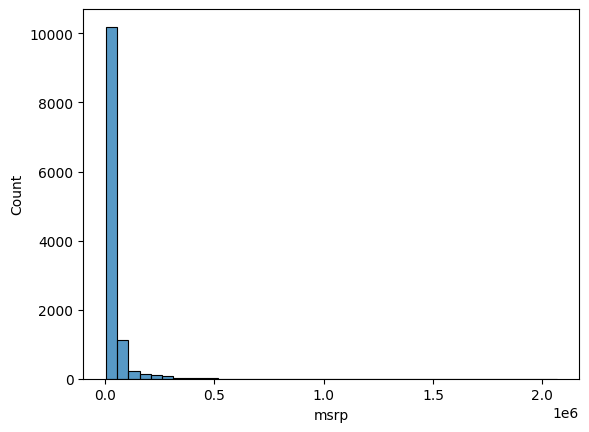

In [10]:
sns.histplot(df.msrp,bins=40)

There are many cars with low prices on the left side, but the number
quickly drops, and there’s a long tail of very few cars with high prices

<Axes: xlabel='msrp', ylabel='Count'>

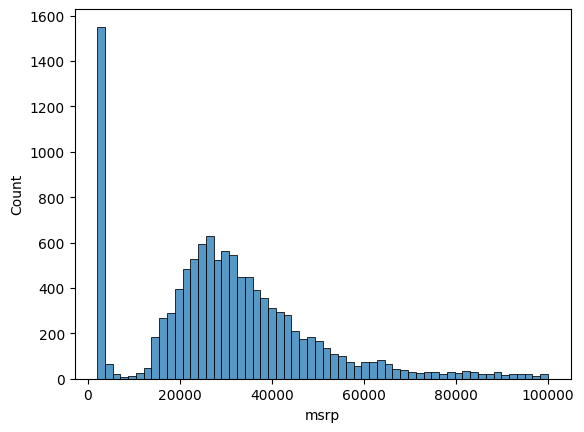

In [11]:
### We can have a closer look by zooming in a bit and looking at values below $100,000
sns.histplot(df.msrp[df.msrp < 100000])

The distribution of the prices for cars below $100,000. Looking only at car
prices below $100,000 allows us to see the head of the distribution better. We also notice
a lot of cars that cost $1,00

<Axes: xlabel='msrp', ylabel='Count'>

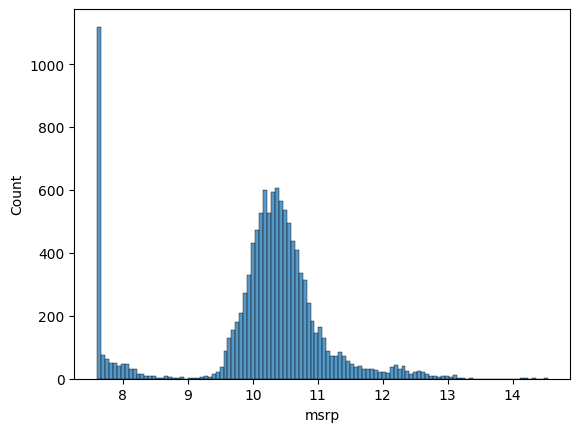

In [12]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)

As we see, this transformation removes the long tail, and now the distribution resem-
bles a bell-shaped curve. This distribution is not normal, of course, because of the
large peak in lower prices, but the model can deal with it more easily

### Checking for missing values

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Validation framework

In [14]:
## Splitting data into valiadtion, test, and training sets
n = len(df) 
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n -(n_val + n_test)

In [15]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [16]:
'''
Uses the array with indices
to get a shuffled DataFrame
'''
df_shuffled = df.iloc[idx]

In [17]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [19]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Machine learning for regression

#### Linear regression

In [20]:
import numpy as np

def train_linear_regression(X, y):
    """
    Entrena un modelo de regresión lineal usando la ecuación normal.

    Parámetros:
    X (numpy.ndarray): Matriz de características de tamaño (n_samples, n_features).
    y (numpy.ndarray): Vector de valores objetivo de tamaño (n_samples,).

    Retorna:
    intercept (float): El término de sesgo (intercepto) del modelo.
    coefficients (numpy.ndarray): Los coeficientes de las características.
    """
    # Agregar una columna de unos a X para incluir el término de sesgo
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Calcular X^T * X
    XTX = X.T.dot(X)
    
    # Calcular la inversa de X^T * X
    XTX_inv = np.linalg.inv(XTX)
    
    # Calcular los pesos (coeficientes) usando la ecuación normal
    w = XTX_inv.dot(X.T).dot(y)
    
    # Retornar el término de sesgo y los coeficientes de las características
    return w[0], w[1:]


### Baseline Solution

In [21]:
'''
We will start with a very naive way of creating features: select a few numerical fea-
tures, and form the matrix X from them.
'''
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
'popularity']
df_num = df_train[base]

In [22]:
df_num = df_num.fillna(0)

In [23]:
X_train = df_num.values


In [24]:
w_o, w = train_linear_regression(X_train,y_train)

In [25]:
y_pred = w_o + X_train.dot(w)


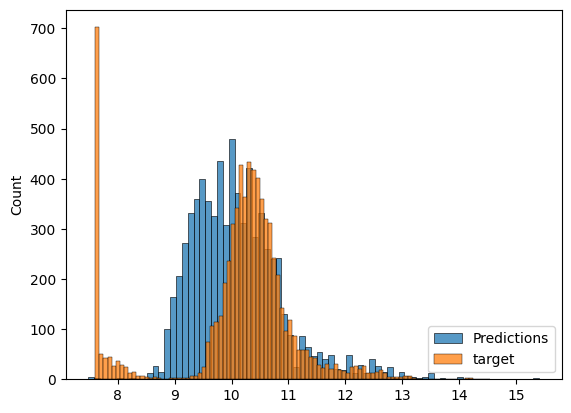

In [26]:
sns.histplot(y_pred,label='Predictions')
sns.histplot(y_train,label='target')
plt.legend(loc='lower right')

The distribution of the predicted values (blue) and the actual values
(orange). We see that our predictions aren’t very good; they are very different from
the actual distribution.

### RMSE: Evaluating model quality

In [27]:
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [28]:
rmse(y_train,y_pred) 

0.7554192603920132

### Validating model quality

In [29]:
def preprare_X(df):
    df_num =df[base]
    df_num = df_num.fillna(0)
    X=df_num.values
    return X

In [30]:
'''
Then we can apply the model to X_val
to get predictions and compare them with y_val.
'''

X_val =preprare_X(df_val)

In [31]:
y_pred_val = w_o + X_val.dot(w)

In [32]:
rmse(y_val, y_pred_val)

0.761653099130156

### Simple feature engineering

In [33]:
def preprare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] =  df.year.max() - df['year']
    features.append('age')
    print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
'''
Let’s test if adding the feature “age” leads to any improvements:
'''
X_train = preprare_X(df_train)
w_o, w = train_linear_regression(X_train,y_train)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']


In [35]:
X_val = preprare_X(df_val)
y_pred_val = w_o + X_val.dot(w)
print('Validation: ', rmse(y_val,y_pred_val))

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
Validation:  0.5172055461058299


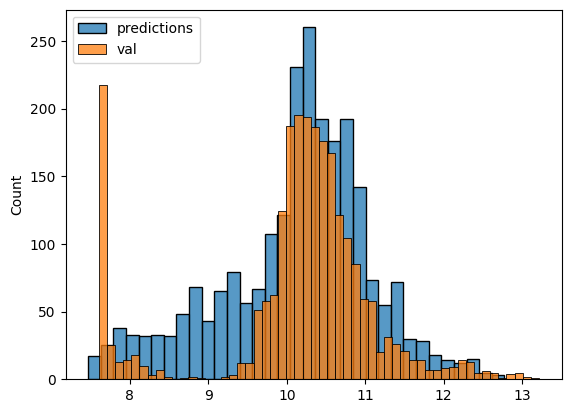

In [36]:
sns.histplot(y_pred_val,label='predictions')
sns.histplot(y_val,label='val')
plt.legend(loc='upper left')

The distribution of predicted (blue) versus actual (orange). With the
new features, the model follows the original distribution closer than previously.

### Handling categorical variables

In [37]:
### one-hot encoding 'number_of_doors'
for v in [2,3,4]:
    feature = 'num_doors_%s' % v
    value = (df['number_of_doors'] == v).astype(int)
    df[feature] = value
    features.append(feature)

In [38]:
### one-hot encoding make
df['make'].value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [39]:
for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' %v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)
    

In [40]:
## Handling categorical variables number of doors and make
def preprare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] =  df.year.max() - df['year']
    features.append('age')
    for v in [2,3,4]:
        feature = 'num_doors_%s' % v
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' %v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [41]:
'''
Let’s test if adding the feature “age” leads to any improvements:
'''
X_train = preprare_X(df_train)
w_o, w = train_linear_regression(X_train,y_train)

In [42]:
X_val = preprare_X(df_val)
y_pred_val = w_o + X_val.dot(w)
print('Validation: ', rmse(y_val,y_pred_val))

Validation:  0.5076038849556757


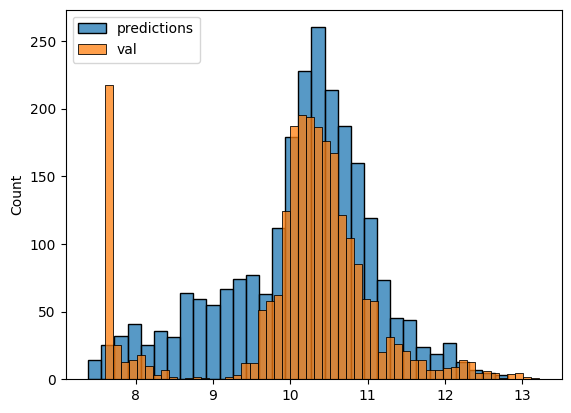

In [43]:
sns.histplot(y_pred_val,label='predictions')
sns.histplot(y_val,label='val')
plt.legend(loc='upper left')

### Regularization

In [44]:
def train_linear_regression_reg(X,y,r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [46]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[13]))
    

    0, 10.68, 0.09, -0.28
0.001, 10.68, 0.09, -0.28
 0.01, 10.65, 0.09, -0.28
  0.1, 10.42, 0.09, -0.28
    1, 9.02, 0.10, -0.28
   10, 6.89, 0.13, -0.27


In [48]:
X_train = preprare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = preprare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5076046984346886


In [51]:
X_train = preprare_X(df_train)
X_val = preprare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.5076038857689587
0.0001 0.5076039662855556
 0.001 0.5076046984346886
  0.01 0.5076120374935452
   0.1 0.5076868731493209
     1 0.5084557973640781
     5 0.5118722208008513
    10 0.517249133501256


### Using the model

In [52]:
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

In [54]:
df_test = pd.DataFrame([ad])
df_test

,city_mpg,driven_wheels,engine_cylinders,engine_fuel_type,engine_hp,highway_mpg,make,market_category,model,number_of_doors,popularity,transmission_type,vehicle_size,vehicle_style,year
0,18,all_wheel_drive,6.0,regular_unleaded,268.0,25,toyota,"crossover,performance",venza,4.0,2031,automatic,midsize,wagon,2013


In [56]:
x_test = preprare_X(df_test)
y_pred = w_0 + x_test.dot(w)

In [57]:
suggestion = np.expm1(y_pred)
suggestion

array([38967.40509514])